<a href="https://colab.research.google.com/github/Susmitapaul45/BasicDataType/blob/main/Calories_Random_forest_RG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('/content/sample_data/calories.csv')  # Replace with your dataset

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop('Calories', axis=1)  # Replace 'target_column' with your target column
y = df['Calories']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional for Random Forest, but can help with interpretability)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    psnr = 10 * np.log10(np.max(y_true) ** 2 / mse) if mse != 0 else float('inf')
    snr = 10 * np.log10(np.mean(y_true ** 2) / mse) if mse != 0 else float('inf')
    return mse, mae, r2, psnr, snr

mse, mae, r2, psnr, snr = calculate_metrics(y_test, y_pred)

# Print results
print("Random Forest Regression Results:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
print(f"PSNR: {psnr}")
print(f"SNR: {snr}")

Random Forest Regression Results:
MSE: 8.011582466666667
MAE: 1.8145533333333332
R2 Score: 0.9980148670931928
PSNR: 40.35925724528469
SNR: 31.88805959952449


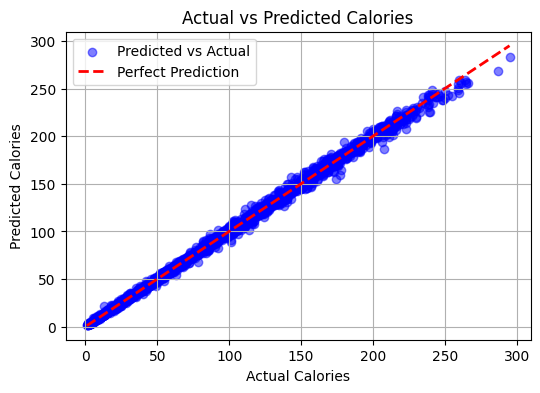

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your Random Forest model
# y_test: Actual target values
# y_pred: Predicted target values from the model

# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.legend()
plt.grid(True)
plt.show()


🌲 Random Forest (Original Features) Results:
MSE: 8.0116, MAE: 1.8146, R2: 0.9980, PSNR: 40.36, SNR: 31.89

📌 PCA + Random Forest Results:
MSE: 55.6614, MAE: 5.4997, R2: 0.9862, PSNR: 31.94, SNR: 23.47

📌 RFE + Random Forest Results:
MSE: 6.2942, MAE: 1.5799, R2: 0.9984, PSNR: 41.41, SNR: 32.94
Selected Feature Indices by RFE: [1 2 4 5 6]

⚠️ LDA (converted to classification) + Random Forest Results:
MSE: 130.1809, MAE: 7.7774, R2: 0.9677, PSNR: 28.25, SNR: 19.78


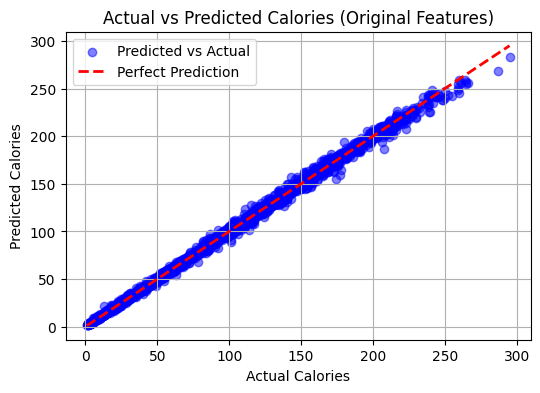

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load the dataset
df = pd.read_csv('/content/sample_data/calories.csv')  # Replace with your dataset path

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop('Calories', axis=1)  # Replace 'Calories' if needed
y = df['Calories']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =======================
# Metric Function
# =======================
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    psnr = 10 * np.log10(np.max(y_true)**2 / mse) if mse != 0 else float('inf')
    snr = 10 * np.log10(np.mean(y_true ** 2) / mse) if mse != 0 else float('inf')
    return mse, mae, r2, psnr, snr

# =======================
# 1. Random Forest without Dimensionality Reduction
# =======================
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

mse, mae, r2, psnr, snr = calculate_metrics(y_test, y_pred)
print("\n🌲 Random Forest (Original Features) Results:")
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, PSNR: {psnr:.2f}, SNR: {snr:.2f}")

# =======================
# 2. PCA + Random Forest
# =======================
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

rf.fit(X_train_pca, y_train)
y_pred_pca = rf.predict(X_test_pca)

mse, mae, r2, psnr, snr = calculate_metrics(y_test, y_pred_pca)
print("\n📌 PCA + Random Forest Results:")
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, PSNR: {psnr:.2f}, SNR: {snr:.2f}")

# =======================
# 3. RFE + Random Forest
# =======================
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

rf.fit(X_train_rfe, y_train)
y_pred_rfe = rf.predict(X_test_rfe)

mse, mae, r2, psnr, snr = calculate_metrics(y_test, y_pred_rfe)
print("\n📌 RFE + Random Forest Results:")
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, PSNR: {psnr:.2f}, SNR: {snr:.2f}")
print("Selected Feature Indices by RFE:", np.where(rfe.support_)[0])

# =======================
# (Optional) 4. LDA + Random Forest (Only if y is discretized)
# =======================
# Note: LDA is a classifier. Only shown here for educational purpose.
try:
    y_class = pd.qcut(y_train, q=3, labels=False)  # Discretize y into 3 classes
    lda = LDA(n_components=1)
    X_train_lda = lda.fit_transform(X_train_scaled, y_class)
    X_test_lda = lda.transform(X_test_scaled)

    rf.fit(X_train_lda, y_train)
    y_pred_lda = rf.predict(X_test_lda)

    mse, mae, r2, psnr, snr = calculate_metrics(y_test, y_pred_lda)
    print("\n⚠️ LDA (converted to classification) + Random Forest Results:")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, PSNR: {psnr:.2f}, SNR: {snr:.2f}")
except Exception as e:
    print("\n⚠️ LDA skipped (not suitable for regression).", e)

# =======================
# Plot actual vs predicted for original model
# =======================
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories (Original Features)')
plt.legend()
plt.grid(True)
plt.show()


Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Regression (Tuned) Results:
MSE: 7.9050
MAE: 1.8035
R2 Score: 0.9980
PSNR: 40.4174
SNR: 31.9462


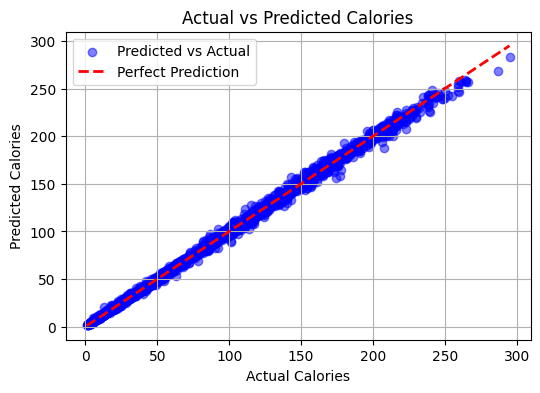

In [ ]:
#Hyperparameter tuning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/calories.csv')

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop('Calories', axis=1)
y = df['Calories']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=10, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best model from tuning
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict with best model
y_pred = best_rf.predict(X_test_scaled)

# Metrics calculation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    psnr = 10 * np.log10(np.max(y_true) ** 2 / mse) if mse != 0 else float('inf')
    snr = 10 * np.log10(np.mean(y_true ** 2) / mse) if mse != 0 else float('inf')
    return mse, mae, r2, psnr, snr

mse, mae, r2, psnr, snr = calculate_metrics(y_test, y_pred)

# Print metrics
print("Random Forest Regression (Tuned) Results:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"PSNR: {psnr:.4f}")
print(f"SNR: {snr:.4f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Cross-validation
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('/content/sample_data/calories.csv')

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop('Calories', axis=1)
y = df['Calories']

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Lists to collect metrics
fold = 1
all_metrics = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Scaling (optional for Random Forest)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_val_scaled = scaler.transform(X_val_fold)

    # Train model
    rf.fit(X_train_scaled, y_train_fold)
    y_pred = rf.predict(X_val_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_val_fold, y_pred)
    mae = mean_absolute_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)
    psnr = 10 * np.log10(np.max(y_val_fold) ** 2 / mse) if mse != 0 else float('inf')
    snr = 10 * np.log10(np.mean(y_val_fold ** 2) / mse) if mse != 0 else float('inf')

    all_metrics.append((mse, mae, r2, psnr, snr))

    print(f"\nFold {fold} Metrics:")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, PSNR: {psnr:.4f}, SNR: {snr:.4f}")
    fold += 1

# Calculate average metrics across folds
avg_metrics = np.mean(all_metrics, axis=0)
print("\nAverage Metrics Across All Folds:")
print(f"MSE: {avg_metrics[0]:.4f}, MAE: {avg_metrics[1]:.4f}, R2: {avg_metrics[2]:.4f}, PSNR: {avg_metrics[3]:.4f}, SNR: {avg_metrics[4]:.4f}")




Fold 1 Metrics:
MSE: 7.2339, MAE: 1.7197, R2: 0.9982, PSNR: 40.5639, SNR: 32.2907

Fold 2 Metrics:
MSE: 7.6632, MAE: 1.7604, R2: 0.9982, PSNR: 40.5523, SNR: 32.1216

Fold 3 Metrics:
MSE: 9.2524, MAE: 1.8385, R2: 0.9975, PSNR: 40.2761, SNR: 31.0581

Fold 4 Metrics:
MSE: 7.6169, MAE: 1.8097, R2: 0.9980, PSNR: 39.7449, SNR: 32.1020

Fold 5 Metrics:
MSE: 7.7537, MAE: 1.7860, R2: 0.9978, PSNR: 39.5370, SNR: 31.3586

Fold 6 Metrics:
MSE: 7.9587, MAE: 1.7653, R2: 0.9980, PSNR: 40.5340, SNR: 31.7890

Fold 7 Metrics:
MSE: 10.8131, MAE: 1.8761, R2: 0.9973, PSNR: 39.0569, SNR: 30.6188

Fold 8 Metrics:
MSE: 6.9738, MAE: 1.7231, R2: 0.9982, PSNR: 40.2567, SNR: 32.1604

Fold 9 Metrics:
MSE: 9.4417, MAE: 1.8640, R2: 0.9975, PSNR: 38.6816, SNR: 30.9065

Fold 10 Metrics:
MSE: 8.1456, MAE: 1.8106, R2: 0.9980, PSNR: 39.7090, SNR: 31.7111

Average Metrics Across All Folds:
MSE: 8.2853, MAE: 1.7953, R2: 0.9979, PSNR: 39.8912, SNR: 31.6117


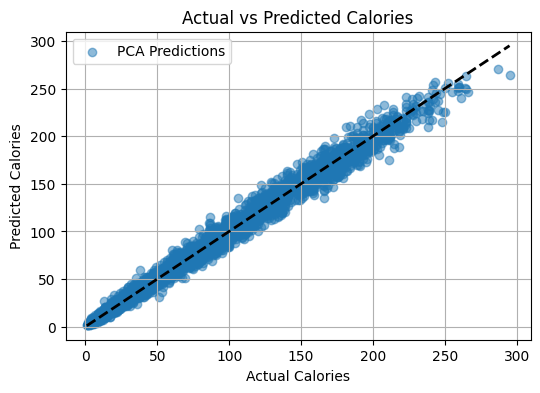

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_pca, alpha=0.5, label='PCA Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.legend()
plt.grid(True)
plt.show()

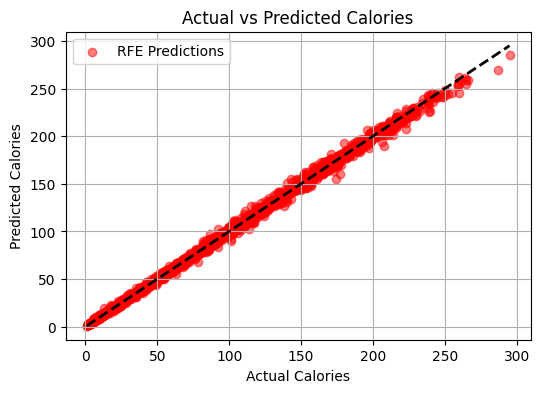

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rfe, alpha=0.5, label='RFE Predictions', color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_pca, alpha=0.5, label='PCA Predictions')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.legend()
plt.grid(True)
plt.show()

Random Forest Regression Results:
MSE: 8.087662633333334
MAE: 1.8211633333333332
R2 Score: 0.9979960157310512


100%|===================| 2987/3000 [02:29<00:00]       

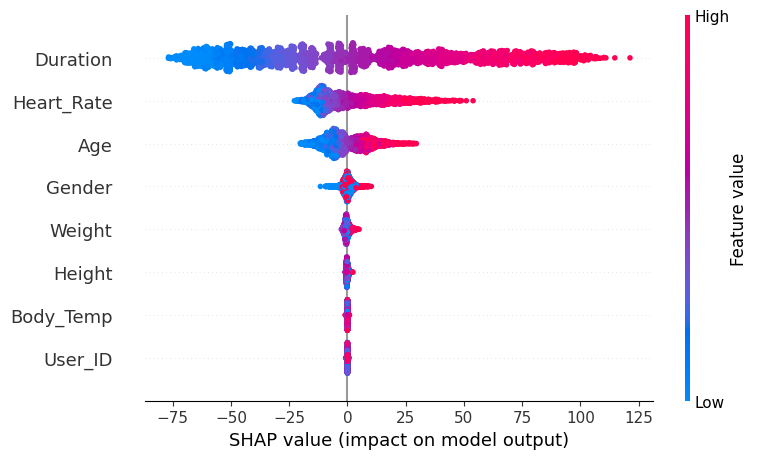

Intercept 1.2271141663034906
Prediction_local [2.5552975]
Right: 2.13


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/calories.csv')

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop('Calories', axis=1)
y = df['Calories']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional for Random Forest, but needed for LIME)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regression model (on unscaled data for SHAP)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Train on original (unscaled) data
y_pred = rf.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

mse, mae, r2 = calculate_metrics(y_test, y_pred)

# Print results
print("Random Forest Regression Results:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

# SHAP analysis (using unscaled data)
explainer_shap = shap.Explainer(rf, X_train)  # Pass unscaled data
shap_values = explainer_shap(X_test)

# Optional: If error persists, disable additivity check
# explainer_shap = shap.Explainer(rf, X_train, check_additivity=False)
# shap_values = explainer_shap(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# LIME analysis (requires scaled data)
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns,
    class_names=['Calories'],
    verbose=True,
    mode='regression'
)

# Explain a single prediction
i = 0  # Index of the instance to explain
exp = explainer_lime.explain_instance(X_test_scaled[i], rf.predict, num_features=5)
exp.show_in_notebook(show_table=True)
